In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle


## Format data

In [ ]:
import shutil, random, os
dirpath = "C:/Users/yeage/Desktop/UMBC/DATA 602/Final/Maps/None"
destDirectory = "C:/Users/yeage/Desktop/UMBC/DATA 602/Final/Maps/NoneSelected"
filenames = random.sample(os.listdir(dirpath), 4824)
for fname in filenames:
    srcpath = os.path.join(dirpath, fname)
    shutil.copy(srcpath, destDirectory)

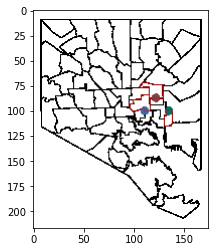

In [2]:
import cv2
import os
import matplotlib.pyplot as plt

DATADIR = "C:/Users/yeage/Desktop/UMBC/DATA 602/Final/Maps"

CATEGORIES = ["NoneSelected", "Hom"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img))  # convert to array
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(img_array)  # graph it
        #plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [4]:
print(img_array.shape)


(217, 174, 3)


(216, 172, 3)


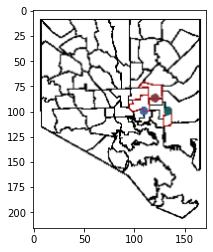

In [3]:
#IMG_SIZE = 768
small = cv2.resize(img_array,(172,216)) 
print(small.shape)
plt.imshow(small)

#new_array = cv2.resize(img_array, ((int(img_array.shape[1]/5)), int((img_array.shape[0]/5))))
#plt.imshow(new_array, cmap='gray')
#plt.show()

In [5]:
#Color Test

training_data = []

def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img))  
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array,(172,216)) 
                training_data.append([new_array, class_num]) 
            except Exception as e:  
                pass
            

create_training_data()

print(len(training_data))

100%|██████████| 4824/4824 [00:05<00:00, 874.67it/s]

9648


9648 samples, evenly split between classes.

In [6]:
import random
#shuffle the order of images to mix it up
random.shuffle(training_data)

In [7]:
#classes nicely blended
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
1
0
1
0
0
1


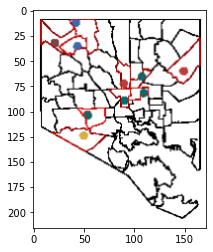

In [8]:
plt.imshow(training_data[1][0])

In [9]:
#for i in range(50):
 #   print(training_data[i][0].shape)

In [10]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

#X = np.array(X).reshape(-1, 446, 182, 1)

In [11]:
#Let's save this data
import pickle

pickle_out = open("FinalRGB_X2hr.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("FinalRGB_y2hr.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:

pickle_in = open("FinalRGB_X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("FinalRGB_y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
X[0].shape

In [ ]:
plt.imshow(X[0])

In [ ]:
type(y)

## Our CNN

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import time

import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import TensorBoard

NAME = "MapHomClass-CNN-128-64x2-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir=".\logs{}".format(NAME))


pickle_in = open("FinalRGB_X2hr.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("FinalRGB_y2hr.pickle","rb")
y = pickle.load(pickle_in)
y=np.array(y)

#XX = np.array(X)#/255.0
X=tf.keras.utils.normalize(X, axis=-1, order=2)

model = Sequential()
#model.add(data_augmentation)
model.add(Conv2D(128, (3, 3), input_shape=X.shape[1:],padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3),padding='valid'))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3),padding='valid'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

#opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#opt = Adam(lr=0.01, decay=1e-6)
opt = Adam(lr=0.001)
model.compile(loss='binary_crossentropy',
              #optimizer='adam',
              metrics=['accuracy'], optimizer = opt)

model.fit(X, y, batch_size=20, epochs=20, validation_split=0.15, shuffle=True,callbacks=[tensorboard])

Train on 8200 samples, validate on 1448 samples
Epoch 1/20
8200/8200 [==============================] - 26s 3ms/sample - loss: 0.6940 - accuracy: 0.4909 - val_loss: 0.6931 - val_accuracy: 0.5097
Epoch 2/20
8200/8200 [==============================] - 25s 3ms/sample - loss: 0.6935 - accuracy: 0.5035 - val_loss: 0.6930 - val_accuracy: 0.5097
Epoch 3/20
8200/8200 [==============================] - 25s 3ms/sample - loss: 0.6869 - accuracy: 0.5430 - val_loss: 0.6758 - val_accuracy: 0.5877
Epoch 4/20
8200/8200 [==============================] - 25s 3ms/sample - loss: 0.6621 - accuracy: 0.5973 - val_loss: 0.6594 - val_accuracy: 0.5946
Epoch 5/20
8200/8200 [==============================] - 25s 3ms/sample - loss: 0.6461 - accuracy: 0.6290 - val_loss: 0.6481 - val_accuracy: 0.6222
Epoch 6/20
8200/8200 [==============================] - 25s 3ms/sample - loss: 0.6371 - accuracy: 0.6380 - val_loss: 0.6448 - val_accuracy: 0.6333
Epoch 7/20
8200/8200 [==============================] - 25s 3ms/sample